In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def convolutionOperator (originalMatrix: np.array, kernal: np.array):
    if (kernal.shape[0] > originalMatrix.shape[0] or kernal.shape[1] > originalMatrix.shape[1]):
        raise Exception ("The shape of kernal matrix should be inner the shape of the original matrix!")
    
    X_matrix, Y_matrix = originalMatrix.shape
    X_kernal, Y_kernal = kernal.shape
    
    convolutionalMatrix = []
    for i in range (0, X_matrix - X_kernal + 1):
        lst = []
        for j in range (0, Y_matrix - Y_kernal + 1):
            value = 0
            
            for p in range (0, X_kernal):
                for q in range (0, Y_kernal):
                    value += originalMatrix[i + p][j + q] * kernal[p][q]
                    
            lst.append(value)
            
        convolutionalMatrix.append(lst)
        
    return np.array(convolutionalMatrix)

In [5]:
def zeroPadding (originalMatrix: np.array, numZeroLayers: int = 1):
    X_OriginalMatrix, Y_OriginalMatrix = originalMatrix.shape
    X_NewMatrix, Y_NewMatrix = X_OriginalMatrix + 2 * numZeroLayers, Y_OriginalMatrix + 2 * numZeroLayers
    
    newMatrix = [[0 for _ in range (Y_NewMatrix)] for _ in range (X_NewMatrix)]
    for i in range (numZeroLayers, X_NewMatrix - numZeroLayers):
        for j in range (numZeroLayers, Y_NewMatrix - numZeroLayers):
            newMatrix[i][j] = originalMatrix[i - numZeroLayers][j - numZeroLayers]
            
    return np.array(newMatrix)

In [42]:
def sobelFilter (imageArray: np.array):
    kernal_X = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = 'int')
    kernal_Y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = 'int')
    
    zeroPadding_imageArray = zeroPadding(imageArray)
    
    image_X = convolutionOperator(zeroPadding_imageArray, kernal_X)
    image_Y = convolutionOperator(zeroPadding_imageArray, kernal_Y)
    
    img_sobel = np.sqrt(image_X ** 2 + image_Y ** 2)
    
    return img_sobel

In [41]:
def sobelFilter_eightDirections (imageArray: np.array):
    northMask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = 'int')
    northWestMask = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]], dtype = 'int')
    westMask = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = 'int')
    southWestMask = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]], dtype = 'int')
    southMask = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = 'int')
    southEastMask = np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]], dtype = 'int')
    eastMask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = 'int')
    northEastMask = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]], dtype = 'int')
    
    zeroPadding_imageArray = zeroPadding(imageArray)
    
    north_image = convolutionOperator(zeroPadding_imageArray, northMask)
    northWest_image = convolutionOperator(zeroPadding_imageArray, northWestMask)
    west_image = convolutionOperator(zeroPadding_imageArray, westMask)
    southWest_image = convolutionOperator(zeroPadding_imageArray, southWestMask)
    south_image = convolutionOperator(zeroPadding_imageArray, southMask)
    southEast_image = convolutionOperator(zeroPadding_imageArray, southEastMask)
    east_image = convolutionOperator(zeroPadding_imageArray, eastMask)
    northEast_image = convolutionOperator(zeroPadding_imageArray, northEastMask)
    
    img_sobel = np.sqrt(north_image ** 2 + 
                        northWest_image ** 2 +
                        west_image ** 2 + 
                        southWest_image ** 2 +
                        south_image ** 2 +
                        southEast_image ** 2 +
                        east_image ** 2 + 
                        northEast_image ** 2)
    
    return img_sobel

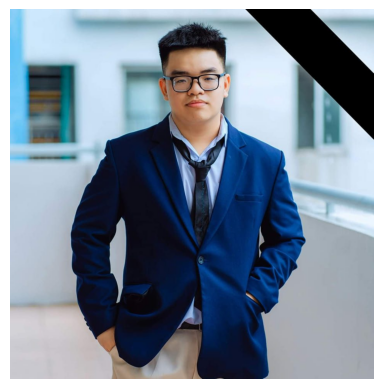

In [44]:
avatarImage = cv2.imread('Avatar.jpg')
avatarImage = cv2.cvtColor(avatarImage, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(avatarImage);

(960, 945)


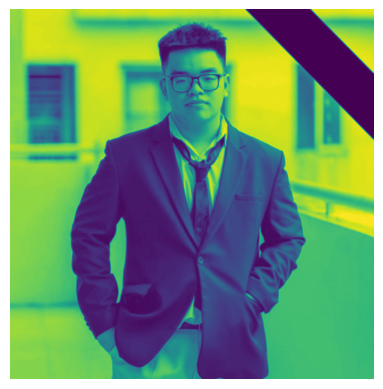

In [46]:
gray_image = cv2.cvtColor(avatarImage, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray_image,(5,5),0)

print(img_gaussian.shape)
plt.axis('off')
plt.imshow(img_gaussian);

In [50]:
edgeImage = sobelFilter(img_gaussian)

#sobel_cv2
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=1)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=1)

img_sobel = np.sqrt(img_sobelx ** 2 + img_sobely ** 2)

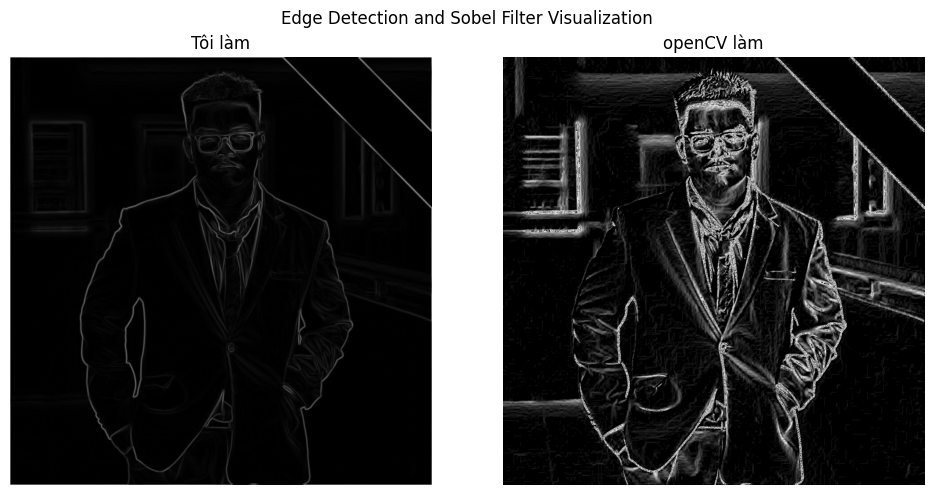

In [68]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].axis('off')
axes[1].axis('off')
cmap = 'gist_gray'
axes[0].imshow(edgeImage, cmap)
axes[1].imshow(img_sobel, cmap)
axes[0].set_title('Tôi làm')
axes[1].set_title('openCV làm')

plt.suptitle('Edge Detection and Sobel Filter Visualization')

plt.tight_layout();